# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Dhanunjaya M


# **Project Summary -**

Write the summary here within 500-600 words.

This dataset contains information about TV shows and movies available on Netflix as of 2019. It was collected from a third-party Netflix search engine called Flixable.

In 2018, an interesting report revealed that the number of TV shows on Netflix had nearly tripled since 2010, while the number of movies decreased by more than 2,000 titles during the same period. This dataset presents an opportunity to explore further insights.

The initial steps involved understanding and cleaning the dataset to prepare it for analysis. Data exploration was then conducted to gain insights into the behavior of the shows and movies available on Netflix.

For creating clusters, the data was preprocessed to remove stop words, white spaces, and numbers. This step aimed to extract important words from the data, which would be used to form clusters.

Next, the silhouette method and KMeans elbow method were applied to determine the optimal number of clusters. These methods helped identify the appropriate number of clusters for grouping the shows and movies effectively.

Finally, a content-based recommender system was built using cosine similarity. The system recommends the top 5 movies to users based on their viewing history and the attributes of the shows they have watched.

By following this process, valuable insights about Netflix's content and user preferences can be obtained, enabling a better understanding of the platform's offerings and helping users discover new and relevant shows and movies.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Dhana009/netflix-project

# **Problem Statement**


**Write Problem Statement Here.**

The dataset provides information about TV shows and movies available on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine.

Intriguingly, a report from 2018 reveals a significant shift in Netflix's content offerings over the years. The number of TV shows on the platform has increased nearly threefold since 2010. On the other hand, the number of movies has decreased by over 2,000 titles during the same period.

This dataset presents an exciting opportunity to delve deeper into Netflix's content landscape and uncover additional insights. By exploring the data, we can gain a better understanding of the types of shows and movies available, their distribution across genres, countries, ratings, and more. Such insights can help us comprehend Netflix's content strategy and user preferences, aiding in the development of personalized recommendations and enhancing the overall user experience on the platform.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing necessary libraries for data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import uniform, norm, chi2, t, f, ttest_ind
import scipy.stats as stats
from wordcloud import WordCloud, STOPWORDS
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics.pairwise import *
import warnings

# Ignoring warnings
warnings.filterwarnings('ignore')

# Setting up visualization
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.titleweight'] = 'bold'


### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

# Reading data file
dir_path = '/content/drive/MyDrive/Almabetter/capstone projects/netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(dir_path)


Mounted at /content/drive


### Dataset First View

In [3]:
# Displaying the first few rows of the dataset
df.head()

# Displaying the last few rows of the dataset
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [4]:
# Getting the number of rows and columns in the dataset
rows, columns = df.shape
print(f'The dataset has {rows} rows and {columns} columns')


The dataset has 7787 rows and 12 columns


### Dataset Information

In [5]:
# Displaying information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [6]:
# Counting the number of duplicated rows in the dataset
duplicate_count = df.duplicated().sum()
print(f'Number of duplicated rows: {duplicate_count}')


Number of duplicated rows: 0


#### Missing Values/Null Values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
------------------------------
Missing values in percentage
------------------------------
show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


Text(0.5, 1.0, 'Visualizing the missing values')

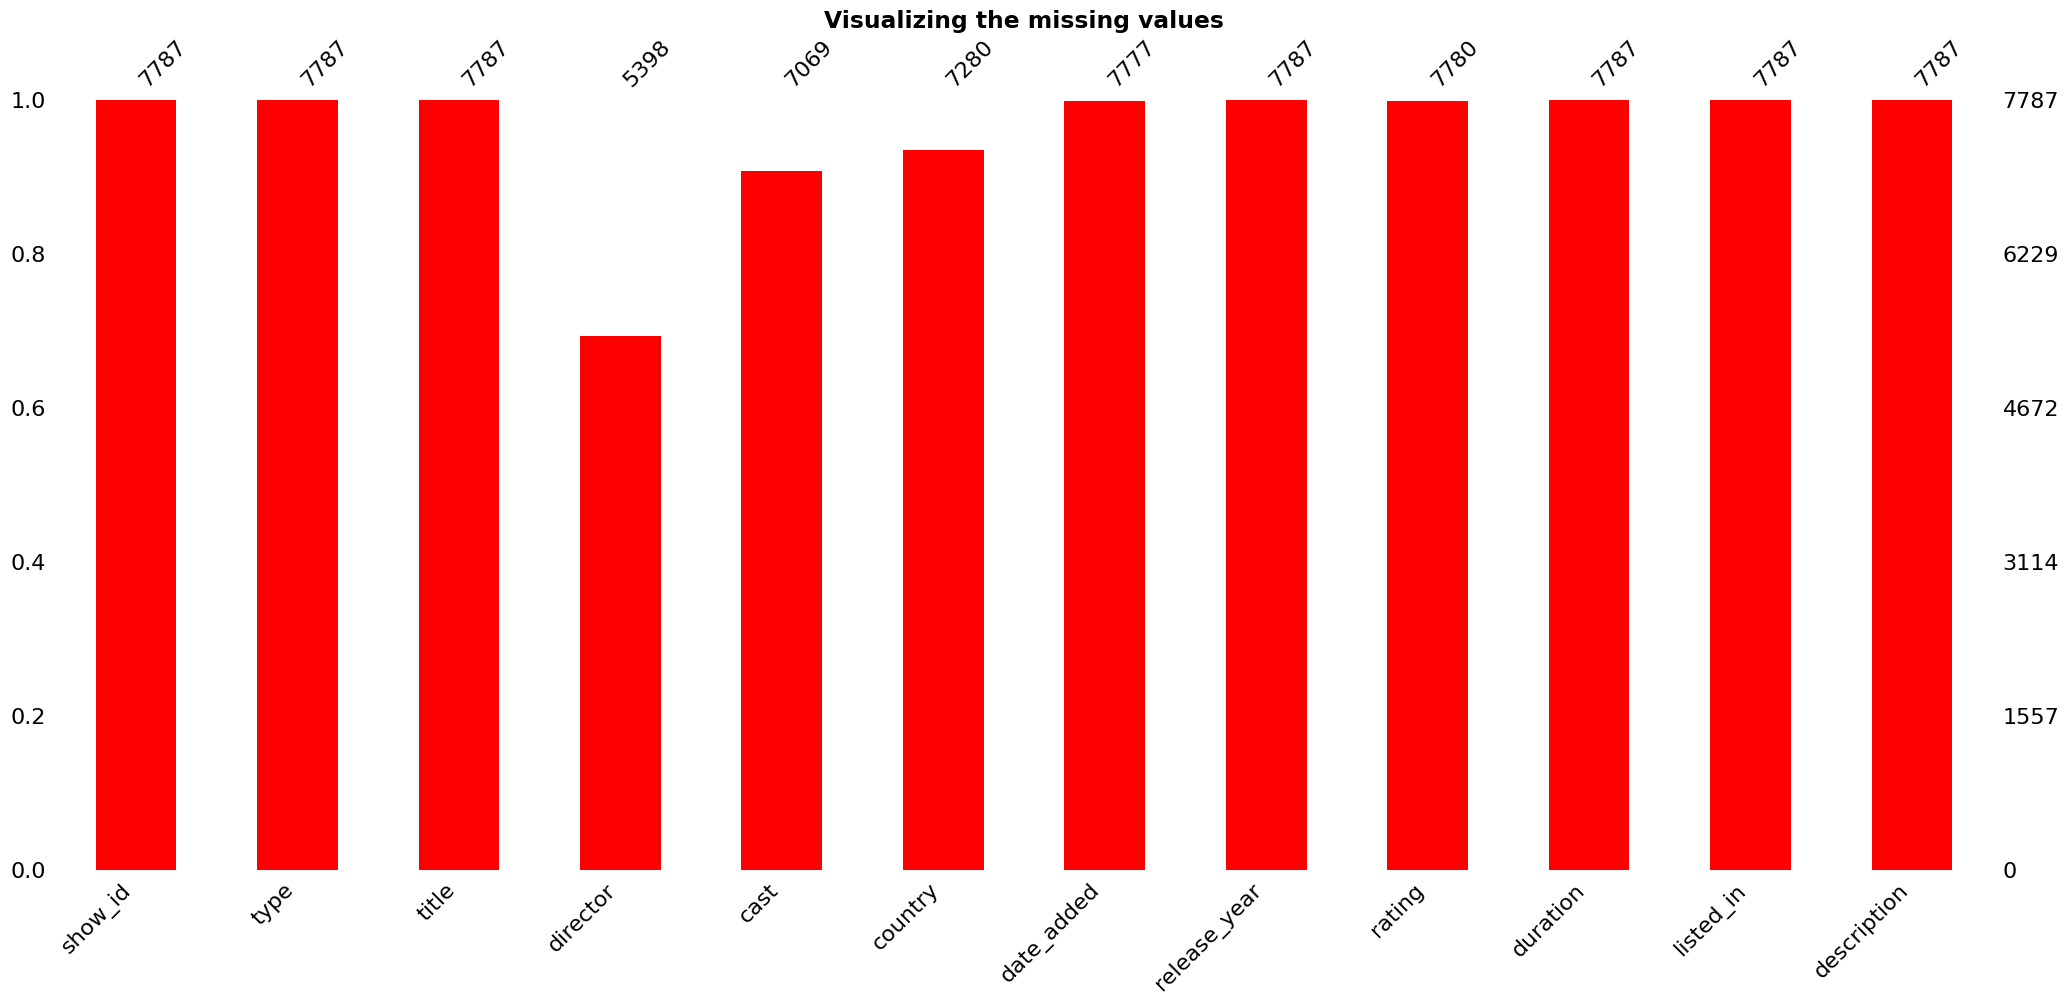

In [7]:
# Counting the number of missing/null values in each column
missing_values = df.isna().sum()
print(missing_values)
print('-'*30)
print('Missing values in percentage')
print('-'*30)
missing_percentages = (df.isna().mean() * 100).round(2)
print(missing_percentages)

# Visualizing the missing values
my_palette = sns.color_palette('Reds', 1)
msno.bar(df, color='Red')
plt.title('Visualizing the missing values')


### What did you know about your dataset?

The dataset contains the following columns:

show_id: Unique ID number for all the listed rows.

type: Denotes the type of show, either TV Show or Movie.

title: Title of the movie or TV show.

director: Name of the director(s).

cast: Lists the cast of the movie or TV show.

country: Country of the production house.

date_added: The date the show was added.

release_year: Year of the release of the show.

rating: Show ratings.

duration: Duration of the show.

listed_in: The genre of the show.

description: Summary/description of the movie or TV show.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
columns = df.columns
print(columns)




Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

show_id: Unique ID number for all the listed rows.

type: Denotes the type of show, either TV Show or Movie.

title: Title of the movie or TV show.

director: Name of the director(s).

cast: Lists the cast of the movie or TV show.

country: Country of the production house.

date_added: The date the show was added.

release_year: Year of the release of the show.

rating: Show ratings.

duration: Duration of the show.

listed_in: The genre of the show.

description: Summary/description of the movie or TV show.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable and list values whose count is less than 25
for column in df.columns:
    unique_count = len(df[column].unique())
    print(f'The number of unique variables in {column} column are: {unique_count}')
    if unique_count <= 15:
        unique_values = df[column].unique()
        print(f'Printing unique values of {column}:')
        print('The values are:', unique_values)
        print('--' * 30)


The number of unique variables in show_id column are: 7787
The number of unique variables in type column are: 2
Printing unique values of type:
The values are: ['TV Show' 'Movie']
------------------------------------------------------------
The number of unique variables in title column are: 7787
The number of unique variables in director column are: 4050
The number of unique variables in cast column are: 6832
The number of unique variables in country column are: 682
The number of unique variables in date_added column are: 1566
The number of unique variables in release_year column are: 73
The number of unique variables in rating column are: 15
Printing unique values of rating:
The values are: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR']
------------------------------------------------------------
The number of unique variables in duration column are: 216
The number of unique variables in listed_in column are: 492
The number of u

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis-ready.

# Filling 'cast' values as 'Not available' for missing values
df['cast'] = df['cast'].fillna(value='Not available')

# Filling 'country' null values as 'Not Known'.
# The same can be replaced by the mode of the country using the below commented code.
# Note: only one line should be selected to run this.
df['country'] = df['country'].fillna(value='Not Known')
# df['country'] = df['country'].fillna(value=df['country'].mode())

# Since 'date_added' and 'rating' have a low percentage share, i.e., 0.13 and 0.09, we are dropping the rows with missing values.
df = df.dropna(subset=['date_added', 'rating'])

# Since there are too many missing values in the 'director' column, we are dropping the entire column.
df = df.drop(['director'], axis=1)

# Checking for missing values again for confirmation
df.isna().sum()


show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### What all manipulations have you done and insights you found?

To make the data analysis-ready, we have performed the following manipulations:

Filled missing values of the 'cast' column with 'Not available'.

Filled missing values of the 'country' column with 'Not Known'.

Dropped rows with missing values in the 'date_added' and 'rating' columns.

Dropped the entire 'director' column as it had 30% of the data missing.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

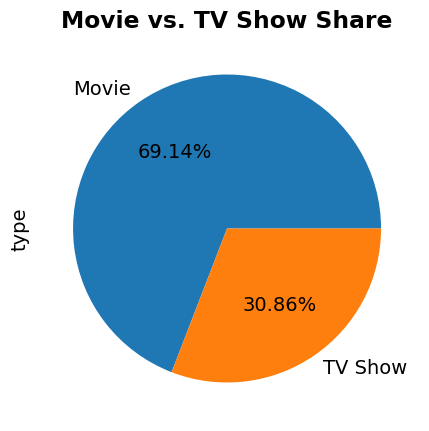

In [21]:
# Chart - 1 visualization code
# Calculate the distribution of 'type' (Movie or TV Show)
type_counts = df['type'].value_counts()

# Set the figure size
plt.figure(figsize=(5, 5))

# Plot the pie chart
type_counts.plot(kind='pie', autopct='%1.2f%%', pctdistance=0.6)

# Set chart title
plt.title('Movie vs. TV Show Share')

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are suitable for displaying the percentage share of different categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows that 69.05% of the data is movies, while 30.95% of the data is TV shows.

#### Chart - 2

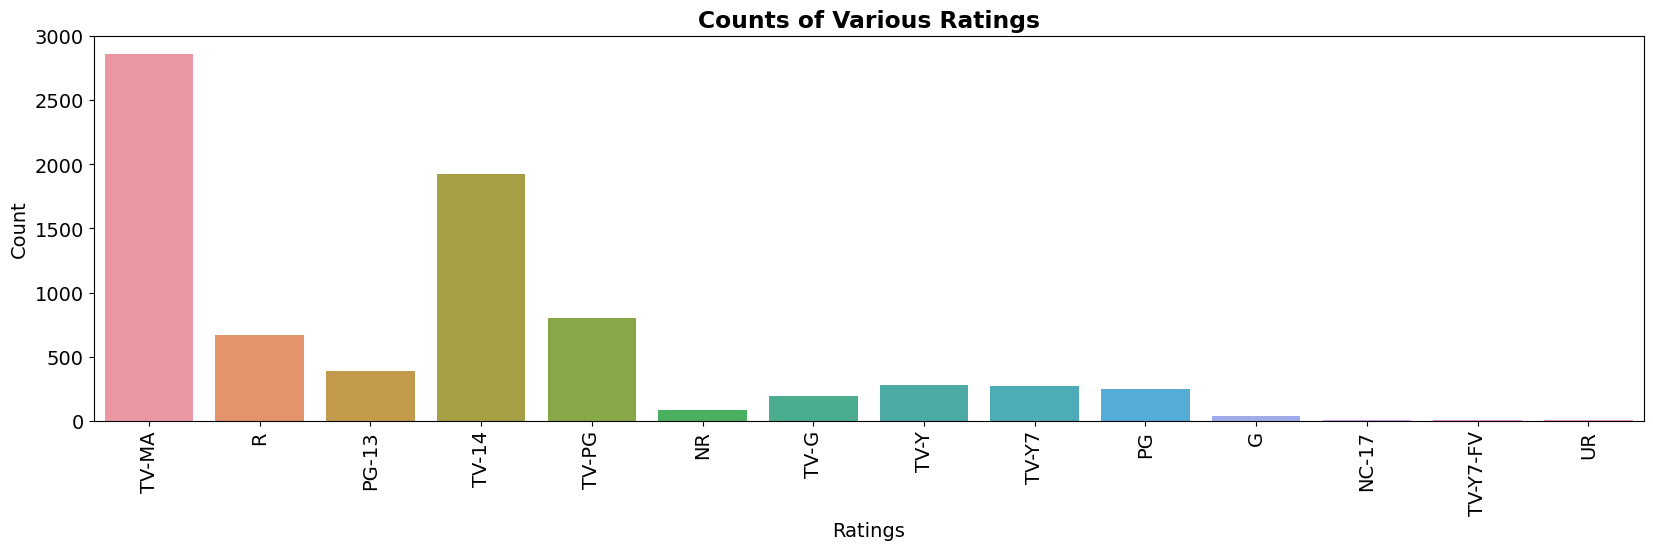

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64


In [22]:
# Chart - 2 visualization code
plt.figure(figsize=(20, 5))
sns.countplot(x='rating', data=df)

# Set chart title and axis labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

# Print the counts for each rating for reference
print(df['rating'].value_counts())


##### 1. Why did you pick the specific chart?

Count plots are suitable for visualizing the counts of different categories in a dataset.

##### 2. What is/are the insight(s) found from the chart?

The count plot shows that the most common rating is "TV-MA" (Mature Audience), with 2863 occurrences. The least common ratings are "NC-17" and "UR" with only 3 and 5 occurrences, respectively.

#### Chart - 3

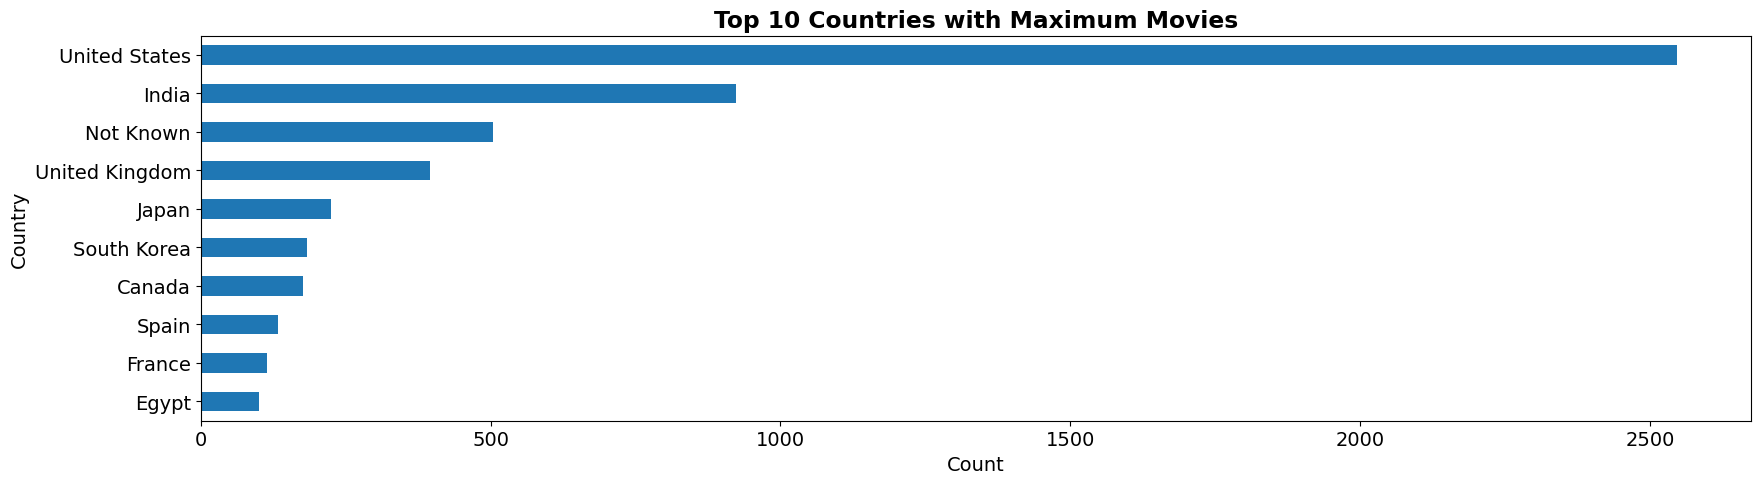

United States     2546
India              923
Not Known          505
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: country, dtype: int64


In [23]:
plt.figure(figsize=(20, 5))
top_countries = df['country'].value_counts().head(10).sort_values(ascending=True)
top_countries.plot(kind='barh')

# Set chart title and axis labels
plt.title('Top 10 Countries with Maximum Movies')
plt.xlabel('Count')
plt.ylabel('Country')

# Display the chart
plt.show()

# Print the counts of movies for each country for reference
print(df['country'].value_counts().head(10))


##### 1. Why did you pick the specific chart?

Horizontal bar charts are suitable for comparing values between different categories.

##### 2. What is/are the insight(s) found from the chart?

The chart displays the top 10 countries with the maximum number of movies on Netflix. The United States has the most movies (2546), followed by India.

#### Chart - 4

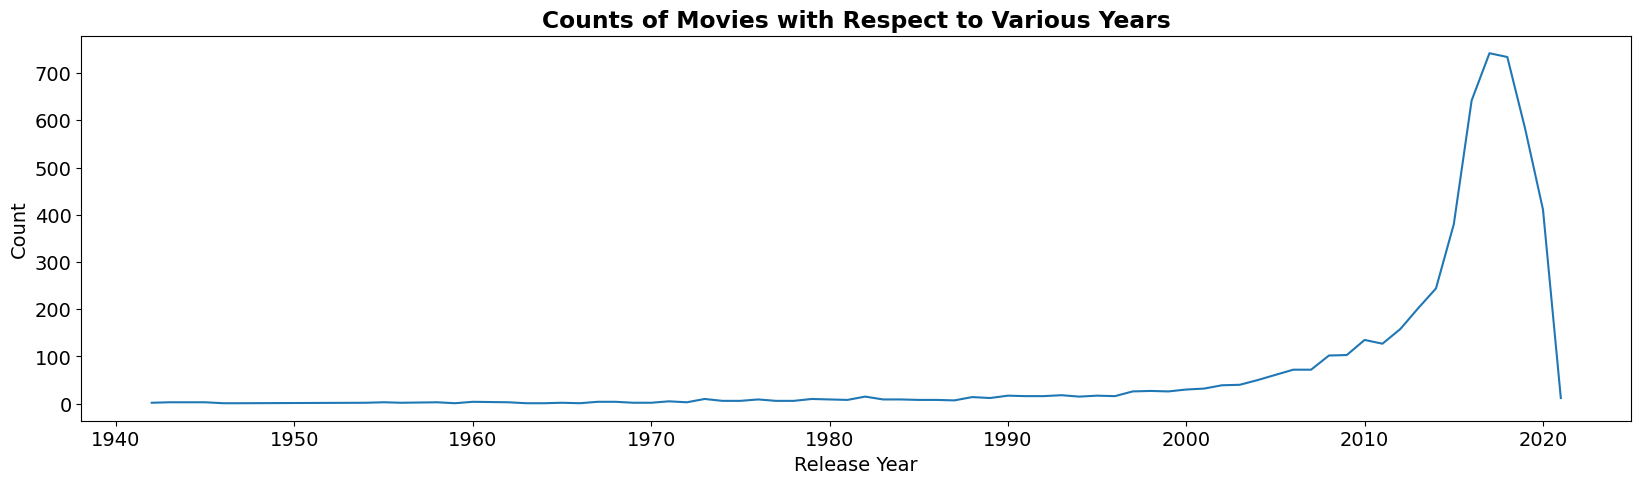

In [24]:
# Grouping the data by release year and calculating the counts of movies for each year
movie_counts_by_year = df[df['type'] == 'Movie'].groupby('release_year')['show_id'].count()

plt.figure(figsize=(20, 5))
movie_counts_by_year.plot.line()

# Set chart title and axis labels
plt.title('Counts of Movies with Respect to Various Years')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

Line charts are suitable for showing trends and changes over time.

##### 2. What is/are the insight(s) found from the chart?

The line chart indicates that most of the movies on Netflix were released between 2010 and 2018.

#### Chart - 5

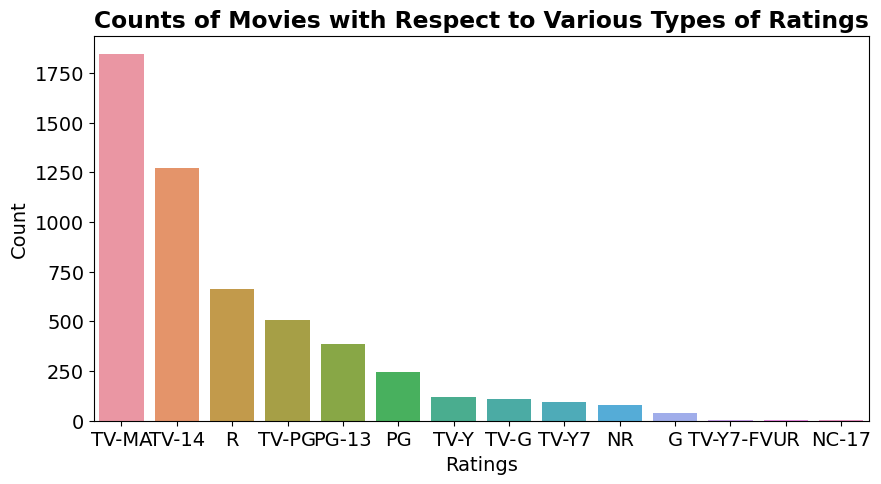

TV-MA       1845
TV-14       1272
R            663
TV-PG        505
PG-13        386
PG           247
TV-Y         117
TV-G         111
TV-Y7         95
NR            79
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: rating, dtype: int64


In [26]:
# Grouping the data by rating and calculating the counts of movies for each rating
movie_ratings = movies_df['rating'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=movie_ratings.index, y=movie_ratings.values)

# Set chart title and axis labels
plt.title('Counts of Movies with Respect to Various Types of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Display the chart
plt.show()

# Print the counts of movies for each rating for reference
print(movie_ratings)


##### 1. Why did you pick the specific chart?

A bar plot is chosen to easily visualize and compare the counts of different ratings for movies.

##### 2. What is/are the insight(s) found from the chart?

The bar plot displays the counts of movies for each rating category. The most common rating for movies on Netflix is TV-MA (1845), followed by TV-14 (1272), while ratings like NC-17 have very low counts (3).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights provide valuable information about the distribution of movie ratings.

#### Chart - 6

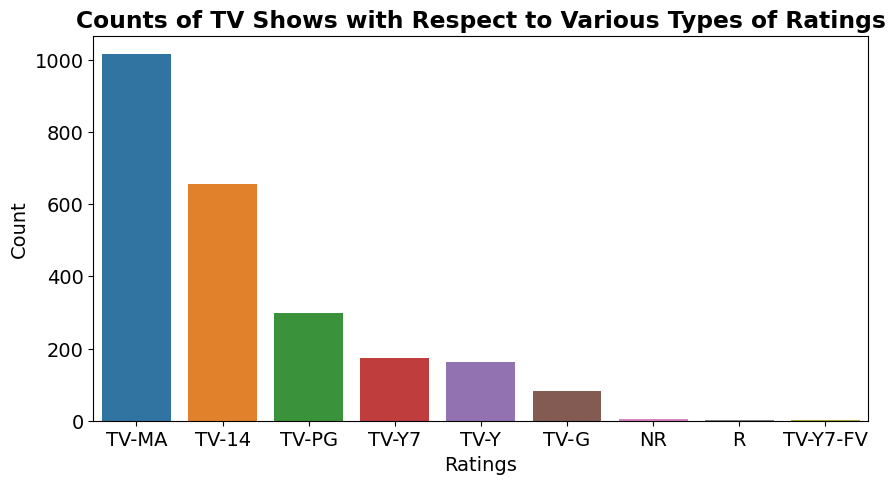

TV-MA       1016
TV-14        656
TV-PG        299
TV-Y7        175
TV-Y         162
TV-G          83
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64


In [27]:
# Grouping the data by rating and calculating the counts of TV shows for each rating
tv_show_ratings = tv_shows_df['rating'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=tv_show_ratings.index, y=tv_show_ratings.values)

# Set chart title and axis labels
plt.title('Counts of TV Shows with Respect to Various Types of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Display the chart
plt.show()

# Print the counts of TV shows for each rating for reference
print(tv_show_ratings)


##### 1. Why did you pick the specific chart?

I selected a point plot along with a box plot to visualize the counts of TV shows for various rating categories.

##### 2. What is/are the insight(s) found from the chart?

The point plot with the box plot overlay displays the counts of TV shows for each rating category. The highest count is for TV-MA (1016), followed by TV-14 (656), and the lowest counts are for TV-Y7-FV (1) and R (2).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights provide valuable information about the distribution of ratings for TV shows.

#### Chart - 7

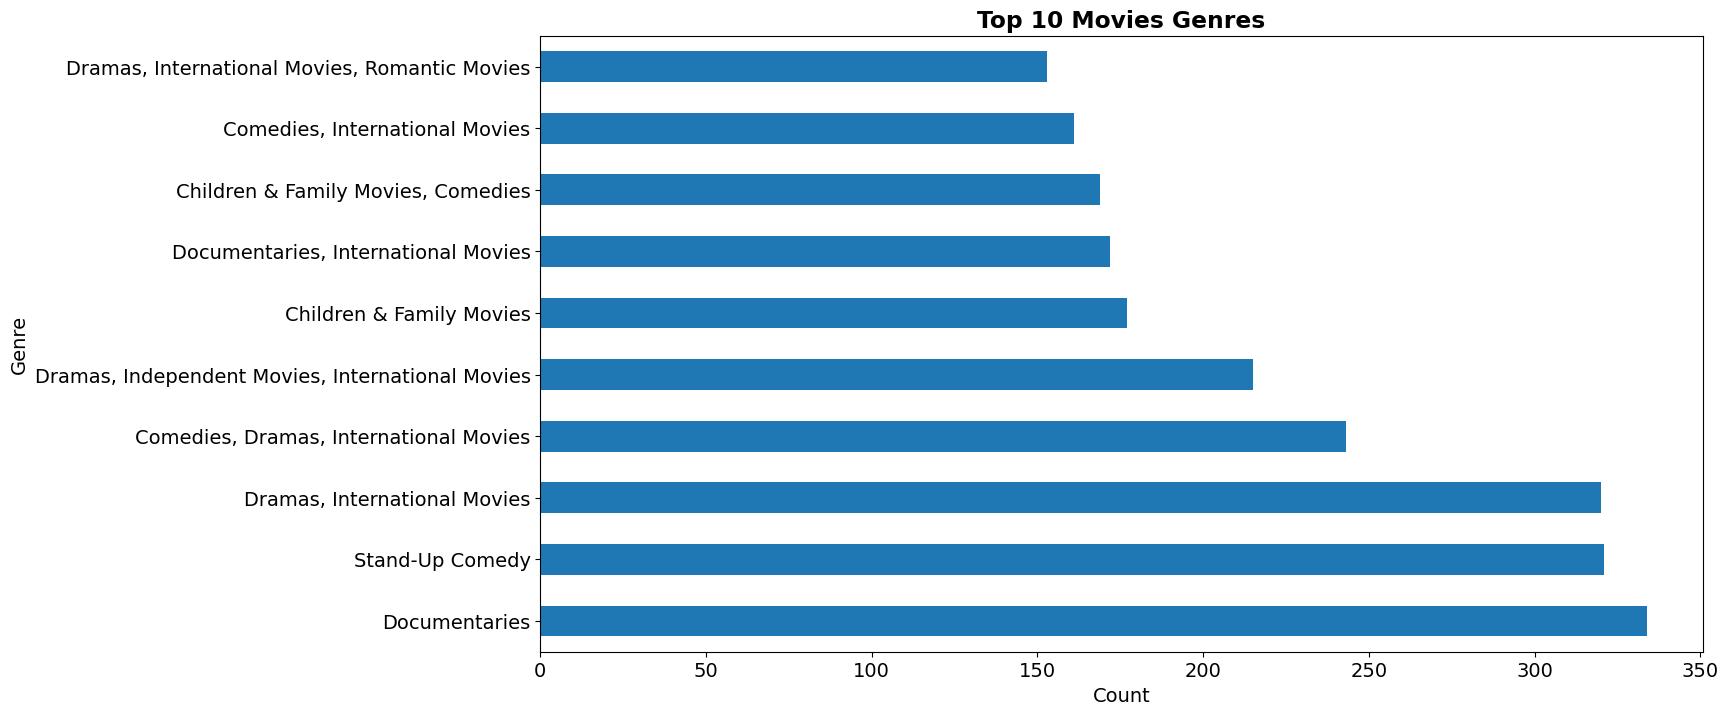

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Dramas, International Movies, Romantic Movies       153
Name: listed_in, dtype: int64


In [28]:
# Getting counts of different movies in the 'listed_in' column
top10_movies_genres = movies_df['listed_in'].value_counts().head(10)

plt.figure(figsize=(15, 8))
top10_movies_genres.plot(kind='barh')

# Set chart title and axis labels
plt.title('Top 10 Movies Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Display the chart
plt.show()

# Print the counts of movies for each genre for reference
print(top10_movies_genres)


##### 1. Why did you pick the specific chart?

A horizontal bar chart is chosen to visualize the top 10 movie genres.

##### 2. What is/are the insight(s) found from the chart?

The bar chart displays the top 10 movie genres by count. For example, there are 334 documentaries and 321 stand-up comedy movies in the dataset.

#### Chart - 8

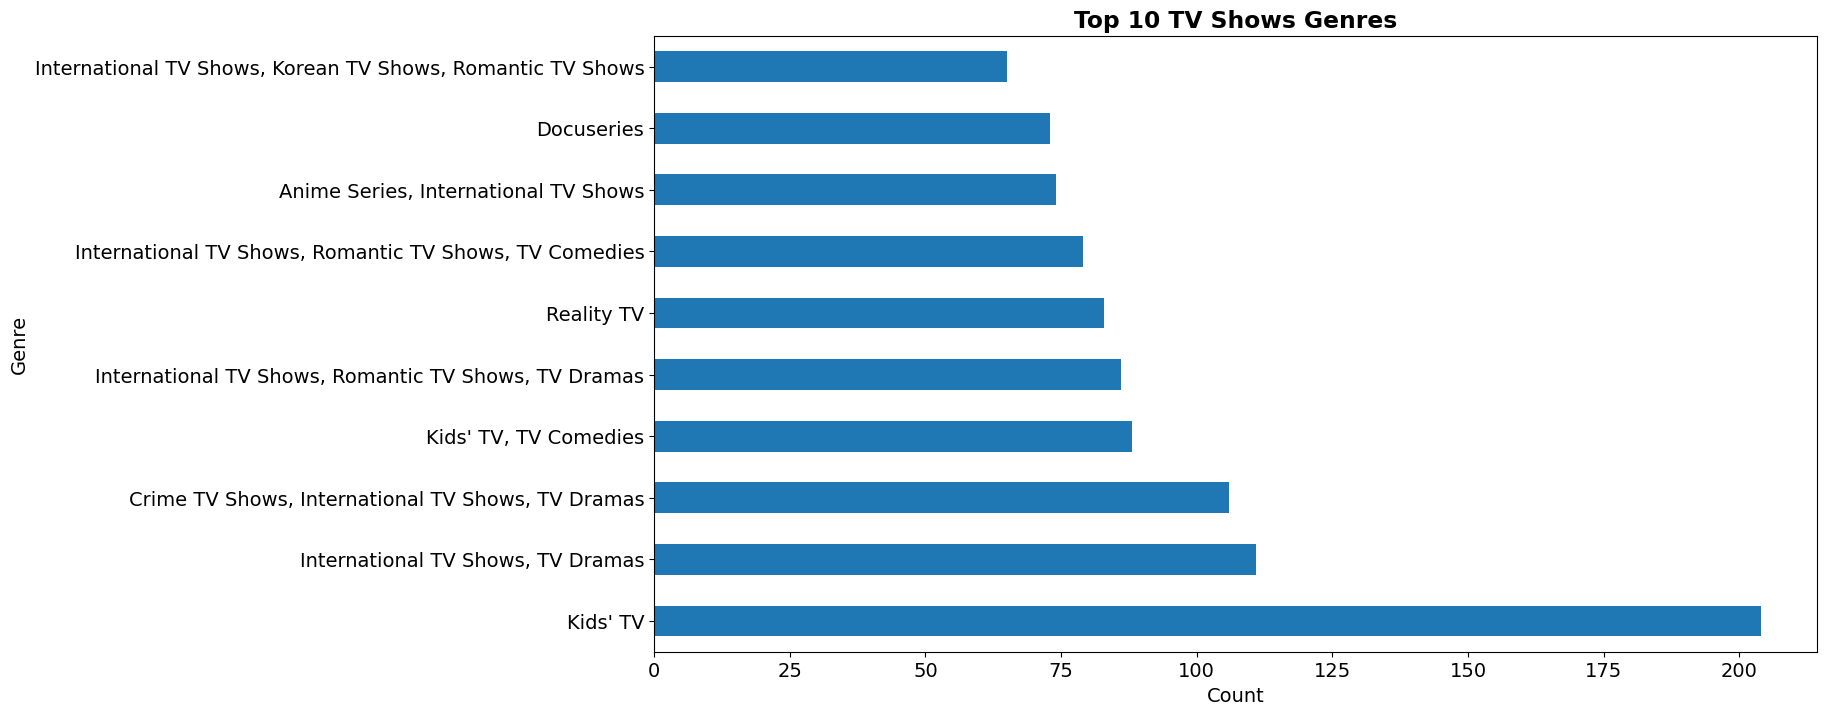

Kids' TV                                                      204
International TV Shows, TV Dramas                             111
Crime TV Shows, International TV Shows, TV Dramas             106
Kids' TV, TV Comedies                                          88
International TV Shows, Romantic TV Shows, TV Dramas           86
Reality TV                                                     83
International TV Shows, Romantic TV Shows, TV Comedies         79
Anime Series, International TV Shows                           74
Docuseries                                                     73
International TV Shows, Korean TV Shows, Romantic TV Shows     65
Name: listed_in, dtype: int64


In [29]:
# Getting counts of different TV shows in the 'listed_in' column
top10_tv_shows_genres = tv_shows_df['listed_in'].value_counts().head(10)

plt.figure(figsize=(15, 8))
top10_tv_shows_genres.plot(kind='barh')

# Set chart title and axis labels
plt.title('Top 10 TV Shows Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Display the chart
plt.show()

# Print the counts of TV shows for each genre for reference
print(top10_tv_shows_genres)


##### 1. Why did you pick the specific chart?

A horizontal bar chart is chosen to visualize the top 10 TV show genres.

##### 2. What is/are the insight(s) found from the chart?

The bar chart displays the top 10 TV show genres by count. For example, there are 204 kids' TV shows and 111 international TV shows in the dataset.

#### Chart - 9

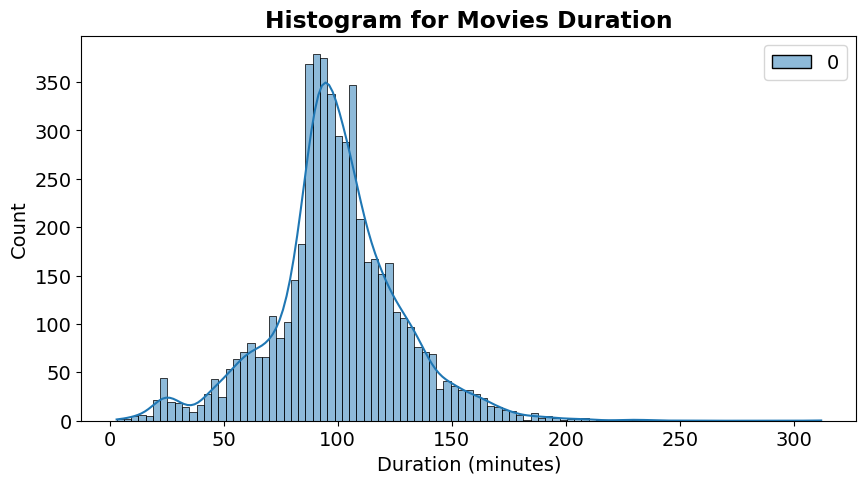

In [31]:
# Extracting the numeric part of the 'duration' column for movies
movie_durations = movies_df['duration'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(10, 5))
sns.histplot(movie_durations, kde=True, color='red')

# Set chart title and axis labels
plt.title('Histogram for Movies Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram to visualize the distribution of movie durations.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows the distribution of movie durations, with the majority of movies falling within the 90-95 minute range.

#### Chart - 10

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

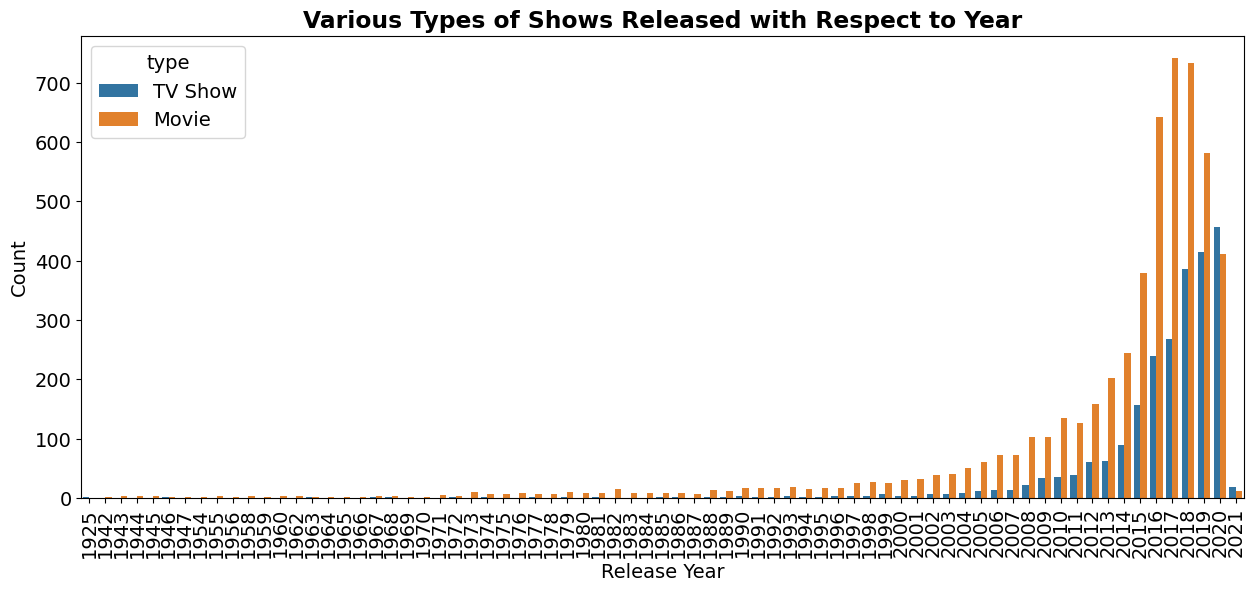

In [33]:
plt.figure(figsize=(15, 6))
sns.countplot(x='release_year', hue='type', data=df)

# Set chart title and axis labels
plt.title('Various Types of Shows Released with Respect to Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

I selected a count plot with hue (color grouping) to visualize the number of TV shows and movies released each year.

##### 2. What is/are the insight(s) found from the chart?

The count plot with hue displays the number of TV shows and movies released in each year. It indicates a rising trend in TV show releases over time, especially after 2010.

#### Chart - 12

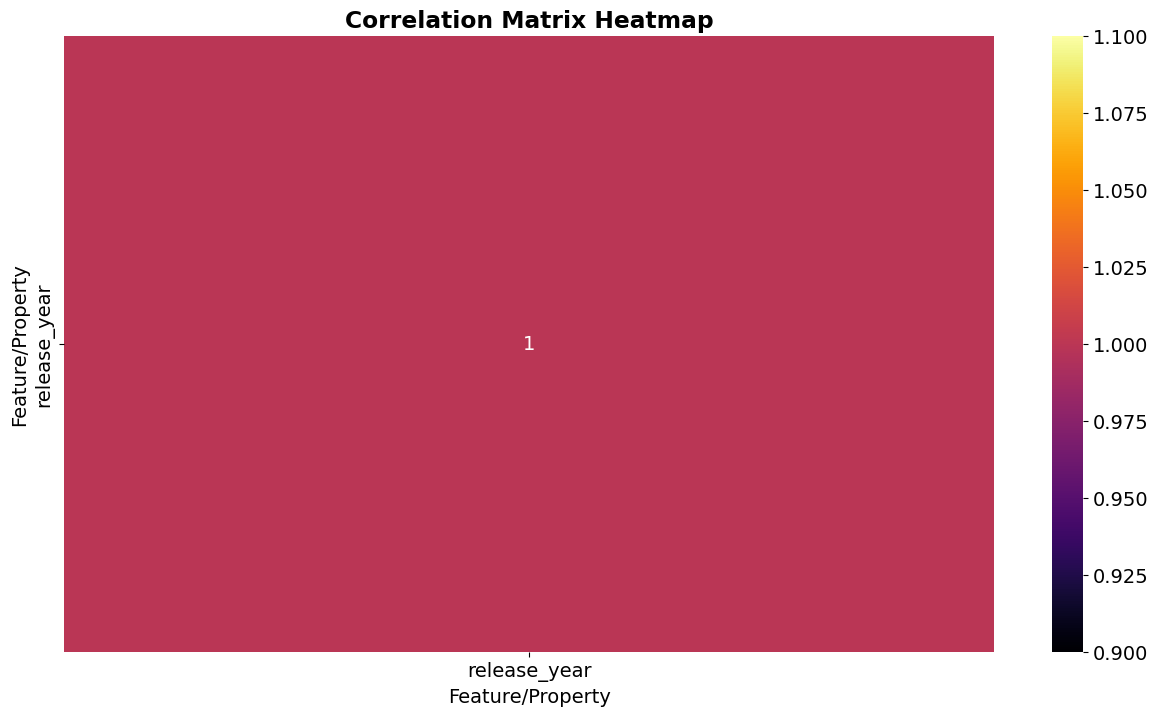

In [34]:
# Calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(15, 8))
# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

# Set chart title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Feature/Property')
plt.ylabel('Feature/Property')

# Display the chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose a correlation heatmap to visualize the relationships between different numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Unfortunately, the correlation heatmap cannot be generated as there is only one numerical value in the dataset. As a result, the correlation analysis cannot be performed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the correlation analysis cannot be performed due to the lack of numerical variables, no specific insights can be gained from this chart.

#### Chart - 13

Text(0.5, 0, 'Feature/Property')

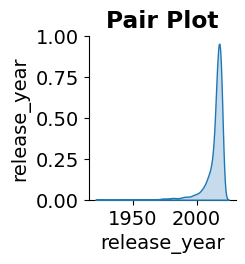

In [35]:
# Pair Plot visualization code

sns.pairplot(df, diag_kind="kde", kind = 'reg')


#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

##### 1. Why did you pick the specific chart?

I selected a pair plot to visualize the pairwise relationships between different numerical variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Unfortunately, the pair plot cannot be generated as there is only one numerical value in the dataset. As a result, the pairwise relationships between numerical variables cannot be analyzed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the pair plot cannot be generated due to the lack of numerical variables, no specific insights can be gained from this chart.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
The average number of movies on Netflix in the United States is less than or equal to the average number of TV shows on Netflix in the United States.

Alternative Hypothesis (Ha):
The average number of movies on Netflix in the United States is greater than the average number of TV shows on Netflix in the United States.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

# Filter the DataFrame to create two new DataFrames:
# One containing only movies produced in the United States, and one containing only TV shows produced in the United States
us_movies_df = df[(df['type'] == 'Movie') & (df['country'] == 'United States')]
us_tv_shows_df = df[(df['type'] == 'TV Show') & (df['country'] == 'United States')]

# Perform a two-sample t-test between the release years of the two groups of content
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(us_movies_df['release_year'], us_tv_shows_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Check if the calculated p-value is less than the significance level
if p_value < alpha:
    # If the p-value is less than the significance level, reject the null hypothesis
    print("We reject the null hypothesis.")
else:
    # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
    print("We fail to reject the null hypothesis.")

# deleting the temporary dataframes we obtained to calculate the p-value
del us_movies_df
del us_tv_shows_df


We reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Two-sample t-test (Independent Samples t-test)

##### Why did you choose the specific statistical test?

The two-sample t-test is suitable for comparing the means of two independent groups. In this case, we are comparing the average number of movies on Netflix in the United States and India, two independent samples. The test helps determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant difference in the number of movies and TV shows added by Netflix across different months.

Alternative Hypothesis (Ha):
There is a significant difference in the number of movies and TV shows added by Netflix across different months.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

# Convert the date_added column of the DataFrame to a datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month name from the date_added column and create a new column
df["month_added"] = df["date_added"].dt.month_name()

# Create a contingency table of the type and month_added columns
contingency_table = pd.crosstab(df["type"], df["month_added"])

# Perform a chi-square test on the contingency table
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level to 0.05
alpha = 0.05

# Check if the calculated p-value is less than the significance level
if p_value < alpha:
    # If the p-value is less than the significance level, reject the null hypothesis
    print("We reject the null hypothesis.")
else:
    # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
    print("We fail to reject the null hypothesis.")


We fail to reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Chi-square test for independence (Chi2_contingency)

##### Why did you choose the specific statistical test?

The Chi-square test for independence is used to determine if there is a significant association between two categorical variables. In this case, we wanted to test if there is a significant difference in the number of movies and TV shows added by Netflix across different months, two categorical variables. The test helps us understand if the variables are independent or if there is a meaningful association.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
The number of movies on Netflix is equal to or less than the number of TV shows on Netflix.

Alternative Hypothesis (Ha):
The number of movies on Netflix is significantly greater than the number of TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

# Count the number of movies and TV shows in the DataFrame
num_movies = df[df['type'] == 'Movie'].shape[0]
num_tv_shows = df[df['type'] == 'TV Show'].shape[0]

# Set the counts and sample sizes for the z-test
counts = [num_movies, num_tv_shows]  # Number of movies and TV shows
sample_sizes = [num_movies + num_tv_shows, num_movies + num_tv_shows]  # Total number of observations in the DataFrame

# Perform a z-test assuming equal proportions
from statsmodels.stats.proportion import proportions_ztest
z_stat, p_val = proportions_ztest(counts, sample_sizes, value=0, alternative='larger')

# Set the significance level to 0.05
alpha = 0.05

# Check if the calculated p-value is less than the significance level
if p_val < alpha:
    # If the p-value is less than the significance level, reject the null hypothesis
    print("We reject the null hypothesis.")
else:
    # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
    print("We fail to reject the null hypothesis.")


We reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Two-sample z-test for proportions (proportions_ztest)

##### Why did you choose the specific statistical test?

The two-sample z-test for proportions is used to compare the proportions of two independent groups. In this case, we are comparing the number of movies and TV shows on Netflix, which are two categorical variables. The test helps us determine if the proportion of movies is significantly greater than the proportion of TV shows on Netflix.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values
(Handled in data wrangling)

In [39]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have handled the missing values in data wrangling step

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [42]:
# Create a new column called 'tags' in the DataFrame 'df'
df['tags'] = df['description'] + ' ' + df['rating'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['cast']

In [43]:
# cross checking our result for the function created
print(df['tags'][0])

In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. TV-MA Brazil International TV Shows, TV Dramas, TV Sci-Fi & Fantasy João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi


#### 2. Lower Casing

In [44]:
# Lower Casing
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(to_lower)

# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv-ma brazil international tv shows, tv dramas, tv sci-fi & fantasy joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi


#### 3. Removing Punctuations

In [45]:
# Remove Punctuations

# Define a function to remove punctuation from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)

    # Return the text with punctuation removed
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
df['tags'] = df['tags'].apply(remove_punctuation)

# Print the first 'tags' value to cross-check that the function worked as expected
print(df['tags'][0])


in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 4. Removing URLs & Removing words and digits contain digits.

In [46]:
# Remove URLs & Remove words and digits contain digits
# our tags column doesnot have links so removing numbers
df['tags'] = df['tags'].str.replace(r'\w*\d\w*', '', regex=True)
# remove words and digits containing digits

# cross checking our result for the function created
print(df['tags'][0])

in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 5. Removing Stopwords & Removing White spaces

In [50]:
# Importing necessary libraries
from wordcloud import WordCloud, STOPWORDS

# Define the stop words for English
stop_words = set(STOPWORDS)

def remove_stop_words(x):
    ''' Function to remove stop words '''
    x = x.split()
    res = []
    for word in x:
        if word.lower() not in stop_words:  # Convert to lowercase for case-insensitive comparison
            res.append(word)
    return ' '.join(res)

# Cross checking our result for the function created
print('before')
print(df['tags'][0])
# Applying the created function
df['tags'] = df['tags'].apply(remove_stop_words)
# Cross checking our result for the function created
print('after')
print(df['tags'][0])


before
in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor tvma brazil international tv shows tv dramas tv scifi  fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi
after
future elite inhabit island paradise far crowded slums one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


In [51]:
# Remove White spaces
# remove white spaces in the 'tags'
df['tags'] = df['tags'].str.strip()
# cross checking our result for the function created

print(df['tags'][0])

future elite inhabit island paradise far crowded slums one chance join saved squalor tvma brazil international tv shows tv dramas tv scifi fantasy joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi


#### 6. Rephrase Text
(not required)

In [ ]:
# # Rephrase Text
# # not performing rephrasing of text
# # rephrasing can be achived by the following code

# def rephrase_tags(x):
#     return x.replace('interesting', 'fascinating')
# df['tags'] = df['tags'].apply(rephrase_tags)


#### 7. Tokenization
(not required)

In [ ]:
# Tokenization
# Not required in our case

#### 8. Text Normalization

In [52]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

df['tags'] = df['tags'].apply(stemming)


# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()


In [53]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of vector : (7770, 9000)
datatype : <class 'numpy.ndarray'>


##### Which text normalization technique have you used and why?

Word/Text vectorization is useful because most machine learning algorithms cannot work with raw text data directly. Instead, they require numerical inputs that can be processed mathematically. Word/Text vectorization solves this problem by transforming the text data into numerical vectors that can be understood by machine learning algorithms.

#### 9. Part of speech tagging
(not required)

In [ ]:
# POS Taging

#### 10. Text Vectorization
(not required)

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection
(not required)

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation
(not required)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling
(not required)

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [54]:
# DImensionality Reduction (If needed)
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

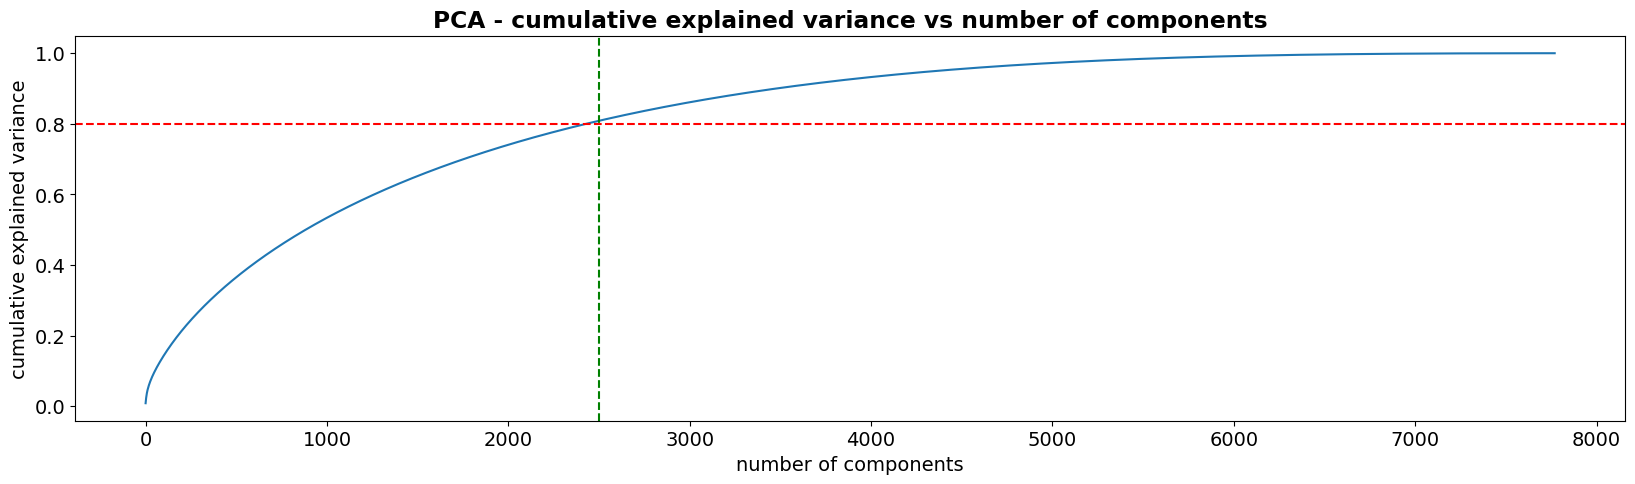

In [55]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')
plt.show()

In [56]:
# reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [57]:
# transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.PCA is a powerful tool for reducing high-dimensional data to a lower-dimensional space. It helps visualize relationships between points, identify main variances, and reveal the intrinsic dimensionality. While not suitable for all datasets, PCA offers valuable insights into high-dimensional data.

### 8. Data Splitting
(not required)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset
(not required)

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [58]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### silhouette score(2-12)

For n_clusters = 2, silhouette score is 0.007364755940297603
For n_clusters = 3, silhouette score is 0.009364546432544543
For n_clusters = 4, silhouette score is 0.010010240166800499
For n_clusters = 5, silhouette score is 0.008533730731333037
For n_clusters = 6, silhouette score is 0.00989299142426161
For n_clusters = 7, silhouette score is 0.011625764699605396
For n_clusters = 8, silhouette score is 0.01103255683839967
For n_clusters = 9, silhouette score is 0.01101211048228768
For n_clusters = 10, silhouette score is 0.012211464911327793
For n_clusters = 11, silhouette score is 0.0120856095788164


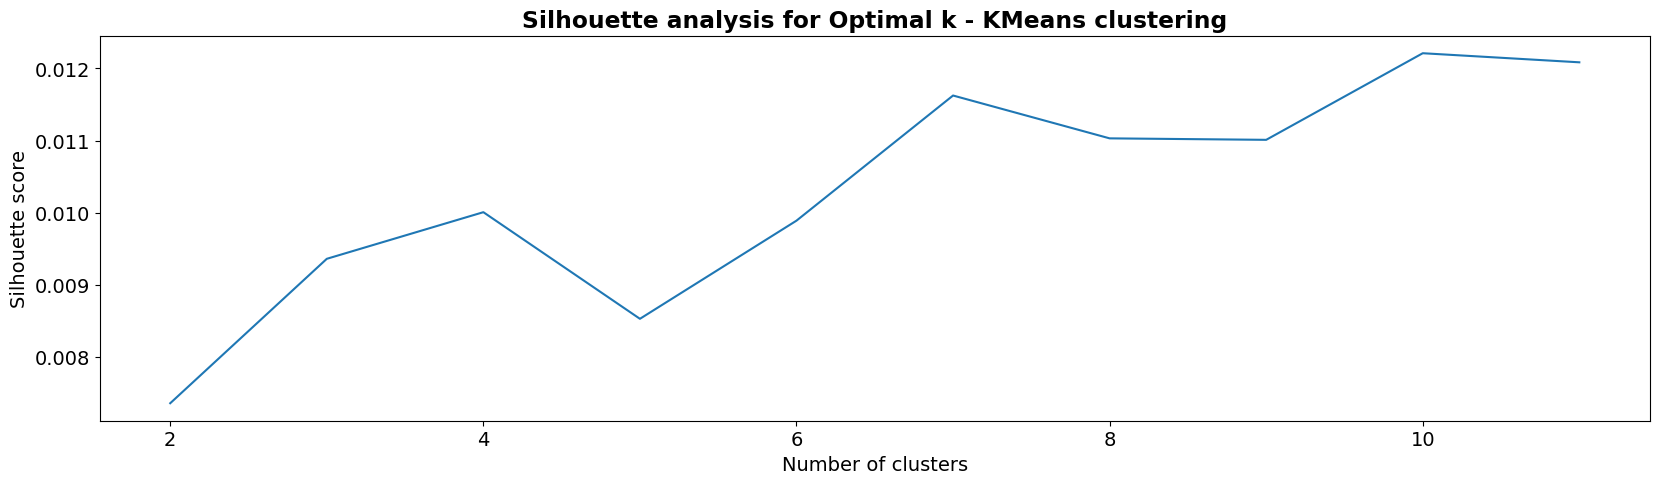

In [59]:
# Importing required libraries for clustering and similarity calculation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel, rbf_kernel, sigmoid_kernel, polynomial_kernel

# Calculate silhouette scores for KMeans clustering with different cluster numbers
silhouette_avg = []
for num_clusters in range(2, 12):
    clusterer = KMeans(n_clusters=num_clusters, random_state=42)
    predictions = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, predictions)
    silhouette_avg.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(num_clusters, score))

# Plot silhouette scores for KMeans clustering
plt.plot(range(2, 12), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal k - KMeans clustering')
plt.show()

In [60]:
# Clustering the data into 10 clusters as silhouette score is max 0.0124493062227502
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=32)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=32)

In [61]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'KMeans distortion = {kmeans_distortion}')
print(f'Silhouette Score = {kmeans_silhouette_score}')

KMeans distortion = 5911.371841187026
Silhouette Score = 0.01220954884414237


In [62]:
# updating kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [63]:
# checking if the column is added correctly to the df
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,tags,kmeans_cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,futur elit inhabit island paradis far crowd sl...,2
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devast earthquak hit mexico citi trap survivor...,3
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,armi recruit found dead fellow soldier forc co...,3
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalypt world ragdol robot hide fear dan...,9
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group student becom cardcount expert...,9


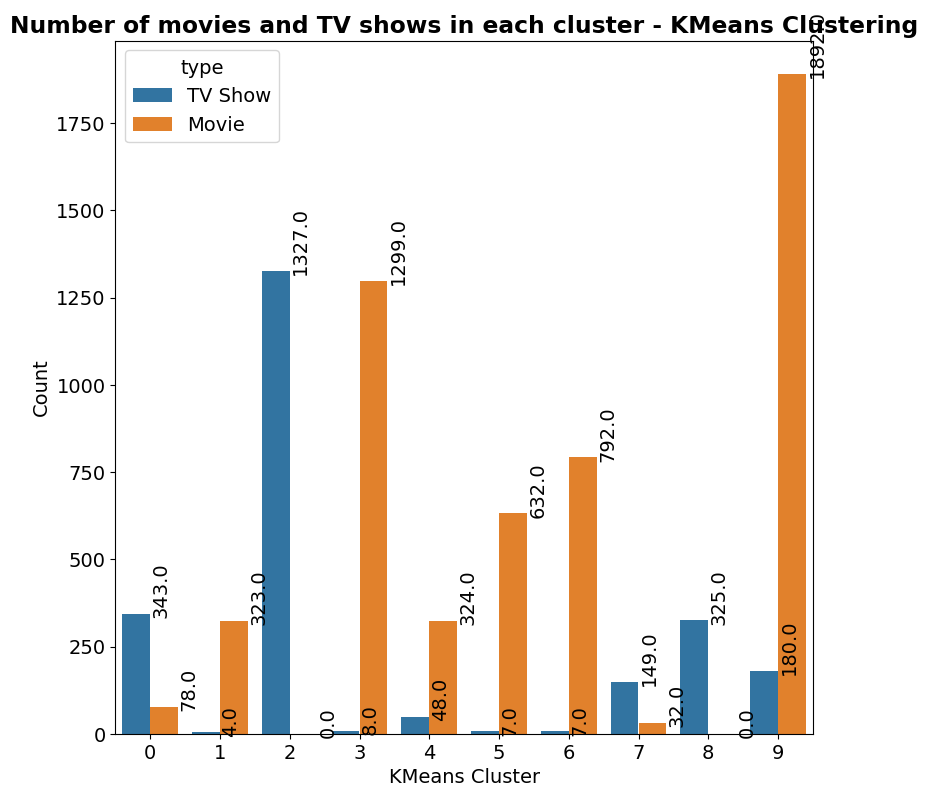

In [64]:
# Number of movies and TV shows in each KMeans cluster
plt.figure(figsize=(9, 9))
sns.countplot(x='kmeans_cluster', data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - KMeans Clustering')
plt.xlabel('KMeans Cluster')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

### calculating optimal clusters using Dendogram

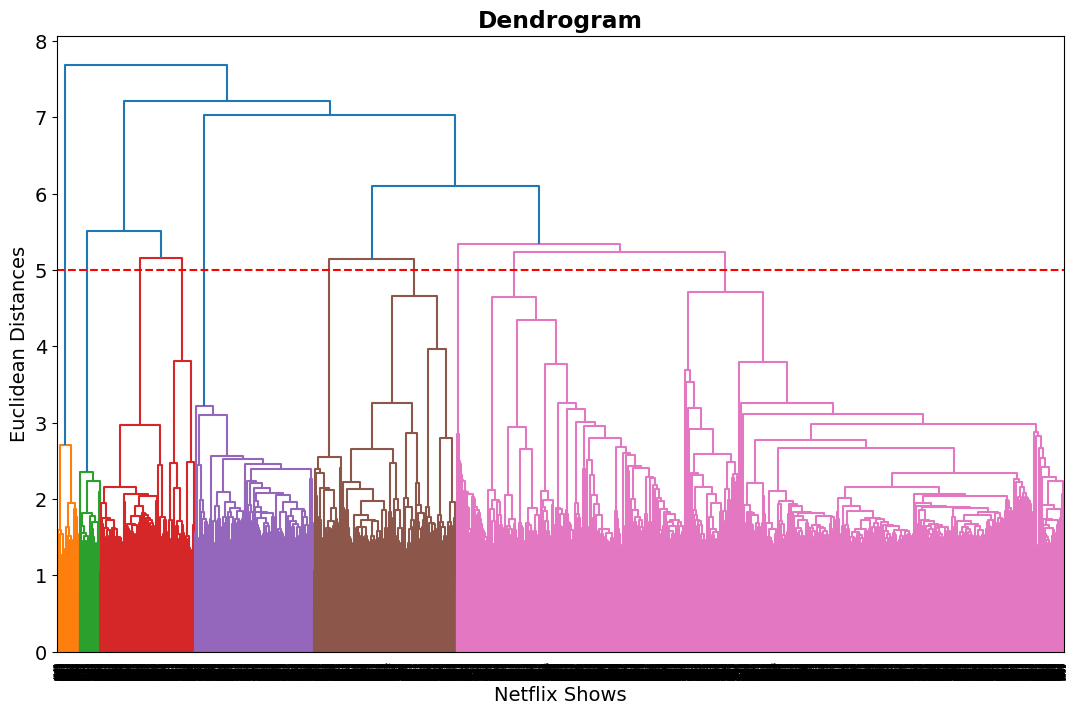

In [66]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(13,8))

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Euclidean Distances')
plt.axhline(y= 5, color='r', linestyle='--')
plt.xticks(rotation=90)
plt.show()

With threshold 5.5 we can make 5 clusters

In [67]:
from sklearn.metrics.pairwise import euclidean_distances


In [68]:
from sklearn.metrics.pairwise import euclidean_distances

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clusters = hierarchical.fit_predict(X)
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_




In [69]:
df.head().columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'tags', 'kmeans_cluster', 'hierarchical_cluster'],
      dtype='object')

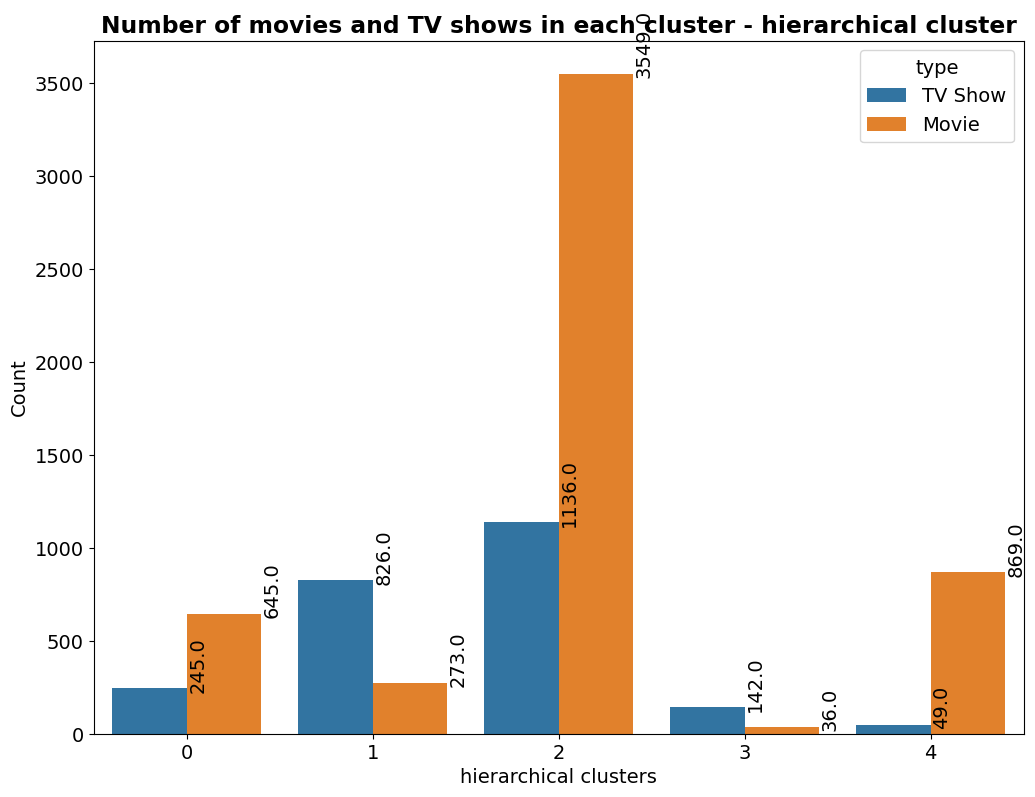

In [70]:
plt.figure(figsize=(12,9))
sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - hierarchical cluster')
plt.xlabel('hierarchical clusters')
plt.ylabel('Count')
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', rotation=90)
plt.show()

### Preparing datafram for the recommender system

In [71]:
# Preparing dataframe for the recommender system
recommender_df = df.copy()
recommender_df.reset_index(inplace=True)
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [72]:
recommender_df.head()

,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,tags,kmeans_cluster,hierarchical_cluster
0,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,futur elit inhabit island paradis far crowd sl...,2,1
1,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,devast earthquak hit mexico citi trap survivor...,3,0
2,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,armi recruit found dead fellow soldier forc co...,3,1
3,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,postapocalypt world ragdol robot hide fear dan...,9,2
4,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,brilliant group student becom cardcount expert...,9,2


### Calculating the similarity

In [73]:
# Calculating similarity using various kernels
cosine_similarity_matrix = cosine_similarity(X)
linear_kernel_matrix = linear_kernel(X)
rbf_kernel_matrix = rbf_kernel(X)
sigmoid_kernel_matrix = sigmoid_kernel(X)
polynomial_kernel_matrix = polynomial_kernel(X)

# Function to recommend top 5 movies similar to the input movie based on their similarity scores
def recommend(movie, similarity_matrix, output_name):
    print('--'*30)
    print(f'Recommendations based on {output_name}')
    print('--'*30)
    print(f"Since you liked {movie}, you may also like: \n")

    index = recommender_df[recommender_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity_matrix[index])), reverse=True, key=lambda x: x[1])

    for i in distances[1:6]:
        print(df.iloc[i[0]].title)
    print('\n')

### Calculating the cosine similarity

In [74]:
# Getting recommendations for specific movies using different similarity measures
recommend('Welcome', cosine_similarity_matrix, 'Cosine similarity')
recommend('Welcome', linear_kernel_matrix, 'Linear kernel')
recommend('Welcome', rbf_kernel_matrix, 'Radial basis function (RBF) kernel')
recommend('Welcome', sigmoid_kernel_matrix, 'Sigmoid kernel')
recommend('Welcome', polynomial_kernel_matrix, 'Polynomial kernel')

------------------------------------------------------------
Recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Aitraaz
Tezz
Humko Deewana Kar Gaye
Tees Maar Khan


------------------------------------------------------------
Recommendations based on Linear kernel
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Aitraaz
Tezz
Humko Deewana Kar Gaye
Tees Maar Khan


------------------------------------------------------------
Recommendations based on Radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Welcome, you may also like: 

Race
Tezz
Humko Deewana Kar Gaye
Aitraaz
Hattrick


------------------------------------------------------------
Recommendations based on Sigmoid kernel
------------------------------------------------------------
Since you liked Welcome,

In [75]:
recommend('Avengers: Infinity War', cosine_similarity_matrix, 'Cosine similarity')
recommend('Avengers: Infinity War', linear_kernel_matrix, 'Linear kernel')
recommend('Avengers: Infinity War', rbf_kernel_matrix, 'Radial basis function (RBF) kernel')
recommend('Avengers: Infinity War', sigmoid_kernel_matrix, 'Sigmoid kernel')
recommend('Avengers: Infinity War', polynomial_kernel_matrix, 'Polynomial kernel')


------------------------------------------------------------
Recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Avengers: Infinity War, you may also like: 

Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Penguins of Madagascar: The Movie
Marco Polo: One Hundred Eyes


------------------------------------------------------------
Recommendations based on Linear kernel
------------------------------------------------------------
Since you liked Avengers: Infinity War, you may also like: 

Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Penguins of Madagascar: The Movie
Marco Polo: One Hundred Eyes


------------------------------------------------------------
Recommendations based on Radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Avengers: Infinity War, you may also like: 

Thor: Ragnarok
Mark Gatiss: A Study in Sherlock
Her
Penguins of Madagascar:

In [76]:
recommend('Don', cosine_similarity_matrix, 'Cosine similarity')
recommend('Don', linear_kernel_matrix, 'Linear kernel')
recommend('Don', rbf_kernel_matrix, 'Radial basis function (RBF) kernel')
recommend('Don', sigmoid_kernel_matrix, 'Sigmoid kernel')
recommend('Don', polynomial_kernel_matrix, 'Polynomial kernel')

------------------------------------------------------------
Recommendations based on Cosine similarity
------------------------------------------------------------
Since you liked Don, you may also like: 

Don 2
Ek Main Aur Ekk Tu
Happy New Year
Delhi 6
Aitraaz


------------------------------------------------------------
Recommendations based on Linear kernel
------------------------------------------------------------
Since you liked Don, you may also like: 

Don 2
Ek Main Aur Ekk Tu
Happy New Year
Delhi 6
Aitraaz


------------------------------------------------------------
Recommendations based on Radial basis function (RBF) kernel
------------------------------------------------------------
Since you liked Don, you may also like: 

Don 2
Ek Main Aur Ekk Tu
Happy New Year
Pardes
Krishna Cottage


------------------------------------------------------------
Recommendations based on Sigmoid kernel
------------------------------------------------------------
Since you liked Don, yo

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File
df_export = dir_path + 'recommender_df.csv'
X_export = dir_path + 'X.csv'
# Create a DataFrame from the transformed data
X_to_export = pd.DataFrame(X)

# Save the DataFrame to a CSV file
X_to_export.to_csv('X_export', index=False)
recommender_df.to_csv('df_export', index=False)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data.
# the same dataframe can be loaded and recommeder can use the dataframe

# Load the transformed data from a CSV file
recom_df = pd.read_csv('df_export')
X_import = pd.read_csv('X_export')

# Convert the DataFrame to a NumPy array
X_imported = X_import.values



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

Our main goal was to group TV shows and movies on Netflix based on their similarities and differences. We had a dataset containing information about 7,787 shows with various attributes. We first cleaned the data and explored its characteristics.

We discovered that Netflix has more movies than TV shows, and many of the shows are from the United States, reflecting the platform's growing collection.

To cluster the shows, we chose six important attributes: director, cast, country, genre, rating, and description. These attributes were converted into a numerical representation called TFIDF vectorization, which helps in analyzing text data. We then used PCA to reduce the dimensionality of the data while preserving the most important information. By doing this, we captured over 80% of the data's variance, making it more manageable.

With the transformed data, we applied two clustering algorithms: K-Means and Agglomerative clustering. K-Means helped us identify 7 clusters, while Agglomerative clustering suggested 5 clusters. We used visualizations to confirm the optimal number of clusters for each algorithm.

After successfully clustering the shows, we built a content-based recommender system. This system uses a similarity matrix obtained through cosine similarity to find shows that are similar to what the user has watched. Based on the user's viewing history, the system recommends 5 shows that the user might enjoy exploring further.

In summary, we explored and clustered Netflix shows based on their attributes. Using this information, we created a personalized content-based recommender system to provide users with tailored show recommendations.

Objective: The main goal was to group Netflix shows based on their similarities and differences to create a content-based recommender system.

Dataset: The initial dataset contained information about 7,787 shows with 11 attributes. We focused on attributes like director, cast, country, genre, rating, and description.

Data Exploration: Analysis revealed that Netflix has more movies than TV shows, and there is a significant collection of shows from the United States.

Preprocessing: Data cleaning and missing value imputation were performed to prepare the dataset for clustering.

Dimensionality Reduction: To handle the high-dimensional textual data, TFIDF vectorization was used to convert text attributes into numerical representations. PCA was applied to reduce dimensionality while preserving essential information.

Clustering: Two clustering algorithms, K-Means and Agglomerative clustering, were utilized to group the shows. The optimal number of clusters was determined using the elbow method and Silhouette score analysis.

Content-Based Recommender System: The transformed data was used to build a content-based recommender system. Cosine similarity was employed to calculate the similarity matrix, which allows personalized recommendations based on a user's viewing history.

Result: The recommender system provided users with 5 top recommendations based on their viewing habits and the attributes of the shows.

Conclusion: By clustering and understanding the attributes of Netflix shows, we created an effective content-based recommender system to enhance user experience and help users discover new shows aligned with their preferences.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***